<a href="https://colab.research.google.com/github/1sallyb/Project3/blob/main/ChurnModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn Modeling Notebook:**


# Import Necessary Libraries / Upload Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn.csv')

# Basic EDA

In [3]:
df.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_1,Voice mail plan_1,region_Eastern,region_Hawaiian-Aleutian,region_Mountain,region_Pacific
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,...,4,2.35,1,0,0,0,0,0,0,0
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,...,6,3.43,4,1,0,0,1,0,0,0
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,...,9,1.46,4,1,0,0,1,0,0,0
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,...,6,2.08,2,0,0,0,1,0,0,0
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,...,1,3.00,1,0,0,0,0,1,0,0


 ## Profile Report

In [5]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=cc3180f284a95d3ee3a4ee6a3bfcc4e453d8eb8d2aeffb95c2016cadb1e95339
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [6]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title = "Churn Data")

In [ ]:
profile.to_notebook_iframe()

In [ ]:
corr_matrix = df.corr()


#create a mask to only return the lower triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

sns.heatmap(corr_matrix, mask=mask, annot = True, cmap='coolwarm', fmt='.1f')


#adjust for readability

plt.xticks(rotation = 45, ha='right')
plt.yticks(rotation= 0)
plt.show()

## Feature Engineering

In [3]:
df['Day_Minutes_per_Charge'] = df['Total day minutes'] / df['Total day charge']
df = df.drop(['Total day minutes', 'Total day charge'], axis = 1)

df['Eve_Minutes_per_Charge'] = df['Total eve minutes'] / df['Total eve charge']
df = df.drop(['Total eve minutes', 'Total eve charge'], axis = 1)

df['Night_Minutes_per_Charge'] = df['Total night minutes'] / df['Total night charge']
df = df.drop(['Total night minutes', 'Total night charge'], axis = 1)

df['Intl_Minutes_per_Charge'] = df['Total intl minutes'] / df['Total intl charge']
df = df.drop(['Total intl minutes', 'Total intl charge'], axis = 1)


df.describe()

,Account length,Area code,Number vmail messages,Total day calls,Total eve calls,Total night calls,Total intl calls,Customer service calls,Churn,International plan_1,Voice mail plan_1,region_Eastern,region_Hawaiian-Aleutian,region_Mountain,region_Pacific,Day_Minutes_per_Charge,Eve_Minutes_per_Charge,Night_Minutes_per_Charge,Intl_Minutes_per_Charge
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,664.000000
mean,102.841079,436.157421,8.407796,100.937031,100.476762,100.113943,4.527736,1.563718,0.142429,0.079460,0.283358,0.424288,0.026987,0.148426,0.073463,5.882239,11.764665,22.222291,3.702840
std,40.819480,41.783305,13.994480,20.396790,18.948262,20.172505,2.482442,1.333357,0.349752,0.270659,0.450967,0.494605,0.162166,0.355788,0.261091,0.000709,0.002253,0.008540,0.004351
min,1.000000,408.000000,0.000000,30.000000,37.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.878995,11.756570,22.196721,3.684211
25%,76.000000,408.000000,0.000000,87.500000,88.000000,86.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.881757,11.762821,22.216252,3.699634
50%,102.000000,415.000000,0.000000,101.000000,101.000000,100.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.882193,11.764706,22.222222,3.702624
75%,128.000000,415.000000,20.000000,115.000000,113.000000,113.500000,6.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.882747,11.766491,22.228002,3.706070
max,232.000000,510.000000,51.000000,165.000000,168.000000,175.000000,18.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.886364,11.771502,22.307692,3.716814


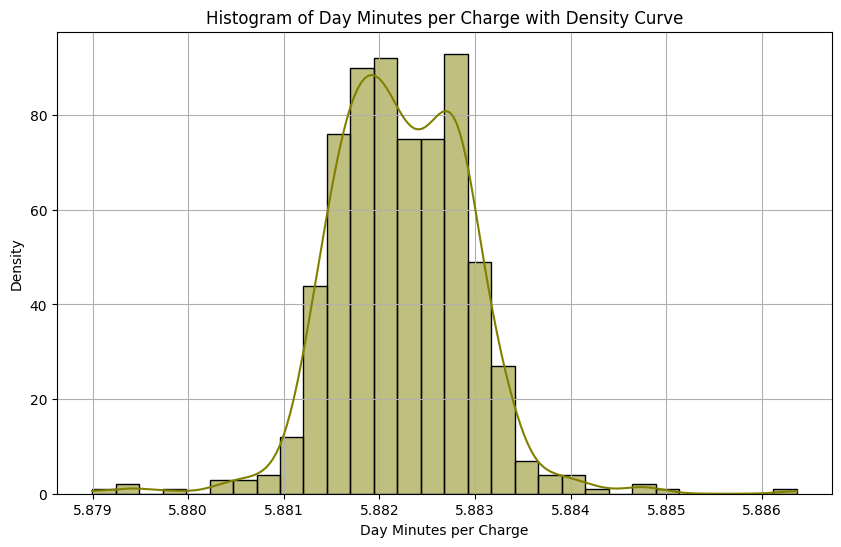

In [4]:
# Create histogram with density curve
plt.figure(figsize=(10, 6))
sns.histplot(df['Day_Minutes_per_Charge'], kde=True, color='olive', bins=30)
plt.title('Histogram of Day Minutes per Charge with Density Curve')
plt.xlabel('Day Minutes per Charge')
plt.ylabel('Density')
plt.grid(True)
plt.show()

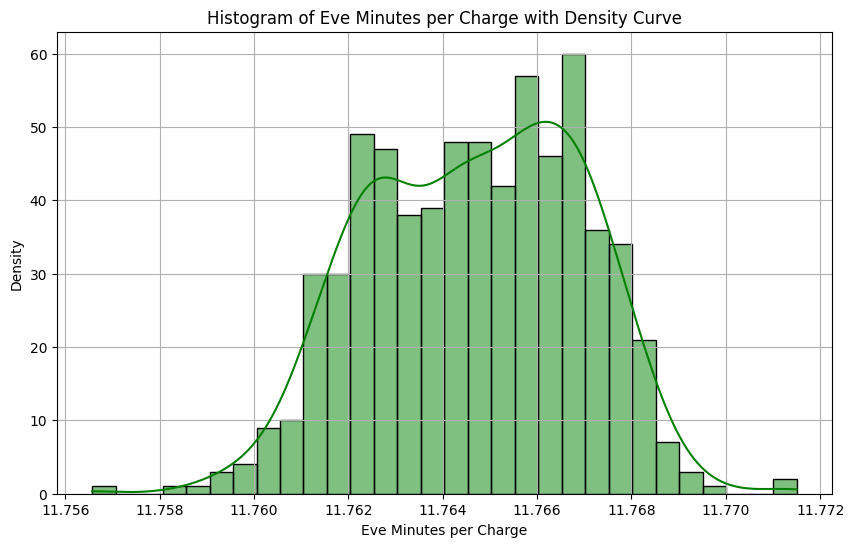

In [5]:
# Create histogram with density curve
plt.figure(figsize=(10, 6))
sns.histplot(df['Eve_Minutes_per_Charge'], kde=True, color='green', bins=30)
plt.title('Histogram of Eve Minutes per Charge with Density Curve')
plt.xlabel('Eve Minutes per Charge')
plt.ylabel('Density')
plt.grid(True)
plt.show()

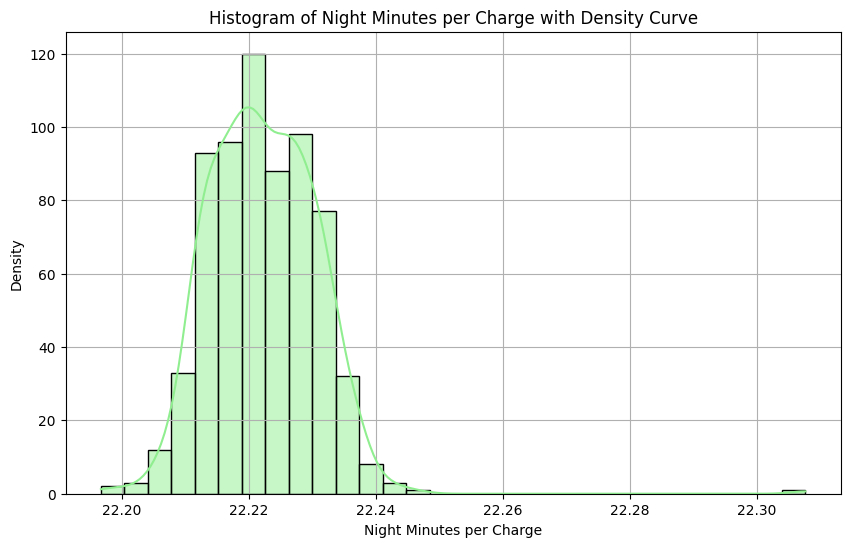

In [7]:
# Create histogram with density curve
plt.figure(figsize=(10, 6))
sns.histplot(df['Night_Minutes_per_Charge'], kde=True, color='lightgreen', bins=30)
plt.title('Histogram of Night Minutes per Charge with Density Curve')
plt.xlabel('Night Minutes per Charge')
plt.ylabel('Density')
plt.grid(True)
plt.show()

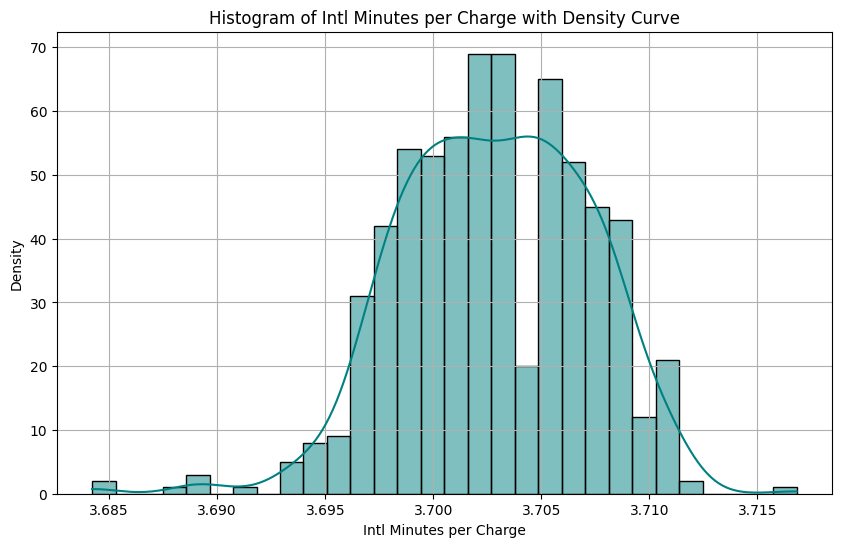

In [11]:
# Create histogram with density curve
plt.figure(figsize=(10, 6))
sns.histplot(df['Intl_Minutes_per_Charge'], kde=True, color='teal', bins=30)
plt.title('Histogram of Intl Minutes per Charge with Density Curve')
plt.xlabel('Intl Minutes per Charge')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Modeling

## Logistic Regression

In [16]:
df = df.dropna(axis = 0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 666
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Account length            664 non-null    int64  
 1   Area code                 664 non-null    int64  
 2   Number vmail messages     664 non-null    int64  
 3   Total day calls           664 non-null    int64  
 4   Total eve calls           664 non-null    int64  
 5   Total night calls         664 non-null    int64  
 6   Total intl calls          664 non-null    int64  
 7   Customer service calls    664 non-null    int64  
 8   Churn                     664 non-null    int64  
 9   International plan_1      664 non-null    int64  
 10  Voice mail plan_1         664 non-null    int64  
 11  region_Eastern            664 non-null    int64  
 12  region_Hawaiian-Aleutian  664 non-null    int64  
 13  region_Mountain           664 non-null    int64  
 14  region_Pacific 

In [18]:
from sklearn.model_selection import train_test_split
# Logistic Regression
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [19]:
y.value_counts()

Churn
0    569
1     95
Name: count, dtype: int64

The split is not even.

In [20]:
X

,Account length,Area code,Number vmail messages,Total day calls,Total eve calls,Total night calls,Total intl calls,Customer service calls,International plan_1,Voice mail plan_1,region_Eastern,region_Hawaiian-Aleutian,region_Mountain,region_Pacific,Day_Minutes_per_Charge,Eve_Minutes_per_Charge,Night_Minutes_per_Charge,Intl_Minutes_per_Charge
0,117,408,0,97,80,90,4,1,0,0,0,0,0,0,5.881415,11.763131,22.224511,3.702128
1,65,415,0,137,83,111,6,4,0,0,1,0,0,0,5.881549,11.766220,22.212766,3.702624
2,161,415,0,67,97,128,9,4,0,0,1,0,0,0,5.882665,11.766013,22.213001,3.698630
3,111,415,0,103,102,105,6,2,0,0,1,0,0,0,5.881726,11.765210,22.227433,3.701923
4,49,510,0,117,109,90,1,1,0,0,0,1,0,0,5.882643,11.766958,22.226368,3.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,26,88,125,94,7,2,0,1,0,0,0,0,5.881596,11.768707,22.226212,3.697749
663,106,408,29,131,131,73,3,1,0,1,0,0,0,0,5.883181,11.765724,22.216844,3.698630
664,60,415,0,118,110,134,8,3,0,0,1,0,0,0,5.882888,11.756570,22.232804,3.707865
665,159,415,0,114,105,82,4,1,0,0,1,0,0,0,5.881538,11.767857,22.213303,3.706070


In [21]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the entire dataset
X_smote, y_smote = smote.fit_resample(X, y)

y_smote.value_counts()

Churn
0    569
1    569
Name: count, dtype: int64

In [22]:
# Split the data into train and test partitions
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 796 samples
Testing set size: 342 samples


In [23]:
# Logistic Regression
from sklearn.preprocessing import MinMaxScaler
# Scale the numerical features
scaler = MinMaxScaler() # Or you can use StandardScaler() for standardization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape

(796, 18)

In [24]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
model = sm.Logit(y_smote, sm.add_constant(X_smote)).fit()

Optimization terminated successfully.
         Current function value: 0.558986
         Iterations 16


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 1138
Model:                          Logit   Df Residuals:                     1119
Method:                           MLE   Df Model:                           18
Date:                Mon, 06 May 2024   Pseudo R-squ.:                  0.1936
Time:                        21:51:04   Log-Likelihood:                -636.13
converged:                       True   LL-Null:                       -788.80
Covariance Type:            nonrobust   LLR p-value:                 3.816e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -545.9363    832.069     -0.656      0.512   -2176.762    1084.889
Account length               0.0024      0.002      1.303      0.193      -0.001       0.006
Area code                   -0.0012      0.002     -0.743      0.457      -0.004       0.002
Number vmail messages        0.0799      0.019      4.269      0.000       0.043       0.117
Total day calls             -0.0002      0.004     -0.044      0.965      -0.007       0.007
Total eve calls              0.0060      0.004      1.565      0.118      -0.002       0.014
Total night calls           -0.0033      0.004     -0.890      0.374      -0.010       0.004
Total intl calls            -0.0472      0.028     -1.662      0.096      -0.103       0.008
Customer service calls       0.3215      0.053      6.049      0.000       0.217       0.426
International plan_1         0.7282      0.277      2.627      0.009       0.185       1.272
Voice mail plan_1           -4.2511      0.625     -6.802      0.000      -5.476      -3.026
region_Eastern              -1.2745      0.155     -8.232      0.000      -1.578      -0.971
region_Hawaiian-Aleutian    -3.1997      1.050     -3.049      0.002      -5.257      -1.143
region_Mountain             -1.5971      0.240     -6.650      0.000      -2.068      -1.126
region_Pacific              -1.1912      0.315     -3.784      0.000      -1.808      -0.574
Day_Minutes_per_Charge     199.4408    115.545      1.726      0.084     -27.024     425.905
Eve_Minutes_per_Charge     -17.0458     34.303     -0.497      0.619     -84.279      50.188
Night_Minutes_per_Charge   -15.6530      9.123     -1.716      0.086     -33.534       2.228
Intl_Minutes_per_Charge    -21.1382     17.709     -1.194      0.233     -55.847      13.570
============================================================================================
"""

Significant Features: Number vmail messages, Customer service calls, international plan, voice mail plan, Eastern region, Hawaiin-Aleutian region, Mountain region, Pacific Region

In [26]:
null_model = sm.Logit(y_smote, [1 for _ in range(len(y_smote))]).fit()

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1


In [27]:
null_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 1138
Model:                          Logit   Df Residuals:                     1137
Method:                           MLE   Df Model:                            0
Date:                Mon, 06 May 2024   Pseudo R-squ.:                   0.000
Time:                        21:54:17   Log-Likelihood:                -788.80
converged:                       True   LL-Null:                       -788.80
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0      0.059          0      1.000      -0.116       0.116
==============================================================================
"""

In [31]:
model.pvalues > 0.05

const                        True
Account length               True
Area code                    True
Number vmail messages       False
Total day calls              True
Total eve calls              True
Total night calls            True
Total intl calls             True
Customer service calls      False
International plan_1        False
Voice mail plan_1           False
region_Eastern              False
region_Hawaiian-Aleutian    False
region_Mountain             False
region_Pacific              False
Day_Minutes_per_Charge       True
Eve_Minutes_per_Charge       True
Night_Minutes_per_Charge     True
Intl_Minutes_per_Charge      True
dtype: bool

In [34]:
less_significant_features = ['Area code', 'Account length', 'Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls', 'Day_Minutes_per_Charge', 'Intl_Minutes_per_Charge', 'Eve_Minutes_per_Charge', 'Night_Minutes_per_Charge']
X_red = X.drop(columns=less_significant_features)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_red,y, test_size = 0.2, random_state = 42)


print(f"Training set size:  {X_train.shape[0]} samples")
print(f"Test set size:  {X_test.shape[0]} samples")

Training set size:  531 samples
Test set size:  133 samples


In [36]:
X_train_sm = sm.add_constant(X_train)

#fit the model
reduced_model = sm.Logit(y_train, X_train_sm).fit()

reduced_model.summary()

Optimization terminated successfully.
         Current function value: 0.371145
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                  531
Model:                          Logit   Df Residuals:                      522
Method:                           MLE   Df Model:                            8
Date:                Mon, 06 May 2024   Pseudo R-squ.:                 0.09609
Time:                        21:59:16   Log-Likelihood:                -197.08
converged:                       True   LL-Null:                       -218.03
Covariance Type:            nonrobust   LLR p-value:                 1.415e-06
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.6644      0.310     -8.589      0.000      -3.272      -2.056
Number vmail messages        0.0139      0.040      0.351      0.726      -0.064       0.091
Customer service calls       0.3688      0.089      4.158      0.000       0.195       0.543
International plan_1         1.2975      0.371      3.498      0.000       0.570       2.025
Voice mail plan_1           -1.3486      1.238     -1.089      0.276      -3.775       1.078
region_Eastern               0.2442      0.322      0.760      0.448      -0.386       0.874
region_Hawaiian-Aleutian    -0.2946      1.075     -0.274      0.784      -2.401       1.812
region_Mountain              0.4335      0.397      1.093      0.274      -0.344       1.211
region_Pacific               1.0155      0.457      2.221      0.026       0.119       1.912
============================================================================================
"""

Significant Features: Customer service calls, International plan, region Pacific.

In [37]:
# Compare the models based on performance metrics (e.g., AIC, BIC)
print("Null Model AIC:", null_model.aic)
print("Model AIC:", model.aic)
print("Reduced Model AIC:", reduced_model.aic)

Null Model AIC: 1579.6029829544357
Model AIC: 1310.2514888829087
Reduced Model AIC: 412.1561487424685


Because the AIC is lower, the reduced model is the best model to choose from.

In [44]:
from sklearn.metrics import confusion_matrix

# Make predictions on training data
y_train_pred = reduced_model.predict(X_train_sm)

# Convert probabilities to binary predictions using a threshold of 0.5
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred_binary)

# Extract TN and FP from confusion matrix
TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]

print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)


True Negatives (TN): 449
False Positives (FP): 6


In [45]:
# Calculate True Positives (TP) and False Negatives (FN) from confusion matrix
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]

# Calculate Specificity and Sensitivity
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

print("Specificity (True Negative Rate):", specificity)
print("Sensitivity (True Positive Rate or Recall):", sensitivity)

Specificity (True Negative Rate): 0.9868131868131869
Sensitivity (True Positive Rate or Recall): 0.02631578947368421


A specificity of approximately 0.987 means that about 98.7% of non-churning customers are correctly identified as such. In other words, the model is very good at correctly classifying customers who are not churning.

A sensitivity of approximately 0.026 means that only about 2.6% of churning customers are correctly identified as such. In other words, the model performs poorly at identifying customers who are actually churning.

## Decision Tree

In [46]:
# Decision Tree
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [47]:
y.value_counts()

Churn
0    569
1     95
Name: count, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the entire dataset
X_smote, y_smote = smote.fit_resample(X, y)

y_smote.value_counts()

Churn
0    569
1    569
Name: count, dtype: int64

In [49]:
 # Split the data into train and test partitions
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 796 samples
Testing set size: 342 samples


In [50]:
from sklearn.tree import DecisionTreeClassifier

DT1 = DecisionTreeClassifier(random_state = 0)

DT1 = DT1.fit(X_train, y_train)

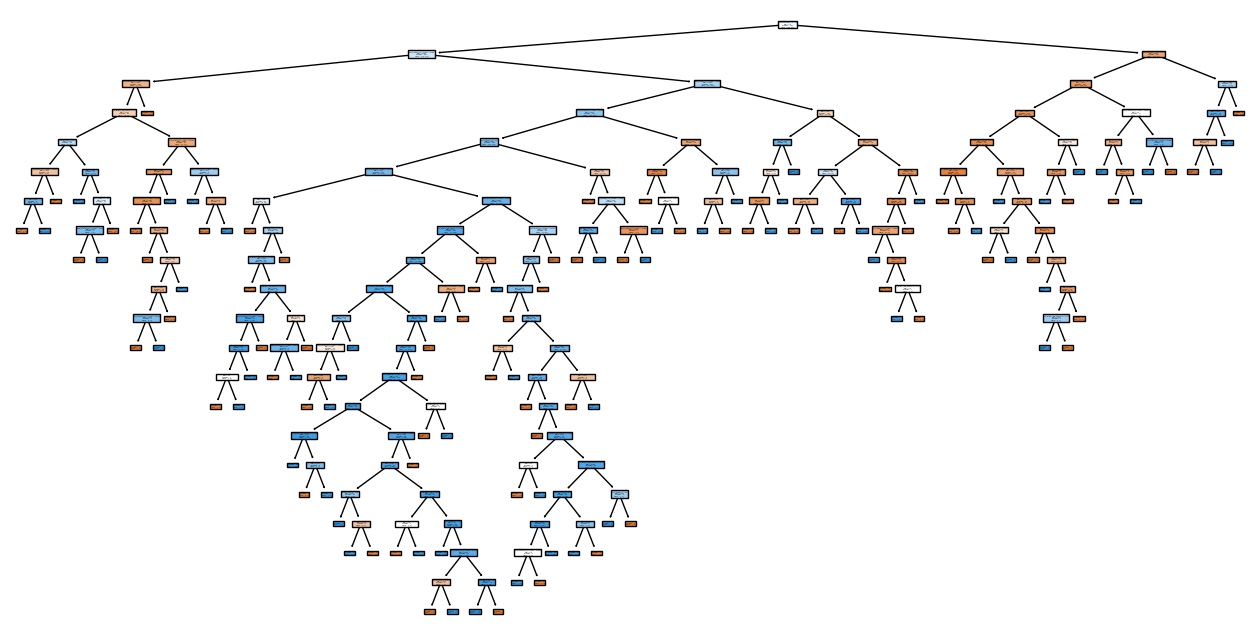

In [51]:
from sklearn import tree
fig = plt.figure(figsize=(16, 8))
tree.plot_tree(DT1, feature_names=X_smote.columns, filled=True)
plt.show()

In [52]:
DT1_n_leaves = DT1.get_n_leaves()
DT1_n_depth = DT1.get_depth()

print(DT1_n_leaves)
print(DT1_n_depth)

120
20


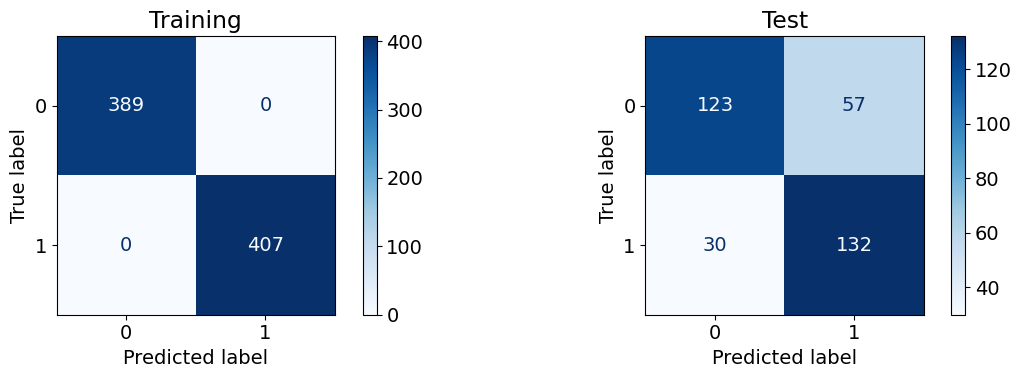

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(DT1, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(DT1, X_test, y_test, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Test')
plt.tight_layout();

Training set is much better than the test. The test is likely to predict customer churn when they will not, and predict that customers will not churn when in fact they will.

In [54]:
accuracy_score(y_train, DT1.predict(X_train))

1.0

In [55]:
accuracy_score(y_test, DT1.predict(X_test))

0.7456140350877193

The accuracy on the testing set is not as good compared to the train.

In [56]:
DT1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [57]:
# Train Hyperparameters
# cost-complexity pruning
path = DT1.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha_values = path.ccp_alphas

In [58]:
# Create empty list to store tree models for each cost-complexity alpha value

DTs = []

In [59]:
# Fit a dt for each value of cc alpha
for ccp_alpha_value in ccp_alpha_values:
  curr_DT = DecisionTreeClassifier(random_state =0, ccp_alpha = ccp_alpha_value).fit(X_train, y_train)

DTs.append(curr_DT)

In [60]:
# Create emjpty lists to store the accuracy
train_acc=[]
test_acc=[]

for DT in DTs:
  y_train_pred = DT.predict(X_train)
  y_test_pred = DT.predict(X_test)

  train_acc.append(accuracy_score(y_train_pred, y_train))
  test_acc.append(accuracy_score(y_test_pred, y_test))

In [61]:
best_ccp_alphas = ccp_alpha_values[test_acc.index(max(test_acc))]
print("Best CCP Alpha: ", best_ccp_alphas)

Best CCP Alpha:  0.0


In [62]:
# Tuning the hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
DT2 = DecisionTreeClassifier(random_state = 0)

In [63]:
param_grid = {
    'ccp_alpha': [0.0, 0.001,0.0001],
 'criterion': ['gini', 'entropy'],
 'max_depth': [None, 10, 20, 30, 40, 50],
 'max_features': [None, 1, 2, 3, 4, 5],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
}

In [64]:
grid_search_dt_model = GridSearchCV(estimator=DT2, param_grid = param_grid, cv= 5, n_jobs = -1, verbose = 2)

In [65]:
grid_search_dt_model.fit(X_train,y_train)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.001, 0.0001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [66]:
grid_search_dt_model.best_score_

0.8015251572327046

In [67]:
best_estimator = grid_search_dt_model.best_estimator_
train_acc = best_estimator.score(X_train, y_train)
train_acc

0.9874371859296482

In [68]:
test_acc = best_estimator.score(X_test, y_test)
test_acc

0.7865497076023392

In [69]:
DT2 = grid_search_dt_model

In [70]:
from sklearn.metrics import roc_auc_score
# now we need to create a dataframe that has the information that we want.
train_probabilities_1 = DT1.predict_proba(X_train)[:,1]
val_probabilities_1 = DT1.predict_proba(X_test)[:,1]
train_y_pred_1 = DT1.predict(X_train)
val_y_pred_1 = DT1.predict(X_test)

train_probabilities_2 = DT2.predict_proba(X_train)[:,1]
val_probabilities_2 = DT2.predict_proba(X_test)[:,1]
train_y_pred_2 = DT2.predict(X_train)
val_y_pred_2 = DT2.predict(X_test)


# Use the predicted class labels to compute the following performance metrics

# Compute the accuracies
train_acc_1 = accuracy_score(y_train, train_y_pred_1)
val_acc_1 = accuracy_score(y_test, val_y_pred_1)
train_acc_2 = accuracy_score(y_train, train_y_pred_2)
val_acc_2 = accuracy_score(y_test, val_y_pred_2)

# Compute the F1 scores
train_f1_1 = f1_score(y_train, train_y_pred_1, pos_label = 1)
val_f1_1 = f1_score(y_test, val_y_pred_1, pos_label = 1)
train_f1_2 = f1_score(y_train, train_y_pred_2, pos_label = 1)
val_f1_2 = f1_score(y_test, val_y_pred_2, pos_label = 1)

# Use the predicted probabilities to compute the ROC AUC scores

# Compute the ROC AUC scores
train_auc_1 = roc_auc_score(y_train, train_probabilities_1 )
val_auc_1 = roc_auc_score(y_test, val_probabilities_1)
train_auc_2 = roc_auc_score(y_train, train_probabilities_2)
val_auc_2 = roc_auc_score(y_test, val_probabilities_2)

# Summarize the above metrics for all four models using a single data frame and display it
modelcompare = pd.DataFrame(data = {'Training Accuracy': [train_acc_1, train_acc_2],
                                    'Validation Accuracy': [val_acc_1, val_acc_2],
                                    'Training F1 Score': [train_f1_1, train_f1_2],
                                    'Validation F1 Score': [val_f1_1, val_f1_2],
                                    'Training ROC AUC Score': [train_auc_1, train_auc_2],
                                    'Validation ROC AUC Score': [val_auc_1, val_auc_2]},
                            index = ['DT1', 'DT2'])

modelcompare

,Training Accuracy,Validation Accuracy,Training F1 Score,Validation F1 Score,Training ROC AUC Score,Validation ROC AUC Score
DT1,1.000000,0.745614,1.000000,0.752137,1.000000,0.749074
DT2,0.987437,0.786550,0.987654,0.782090,0.999627,0.784499


Although DT2 has a smaller training accuracy than DT1, the validation accuracy is slightly higher. As well as the validation ROC AUC score.

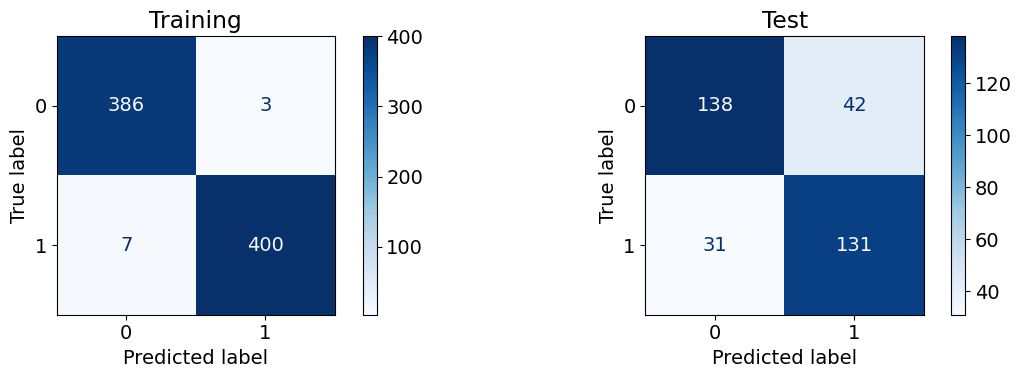

In [71]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(DT2, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(DT2, X_test, y_test, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Test')
plt.tight_layout();

In [74]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = DT2.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN from confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Compute Specificity and Sensitivity
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

print("Specificity (True Negative Rate):", specificity)
print("Sensitivity (True Positive Rate or Recall):", sensitivity)

Specificity (True Negative Rate): 0.7666666666666667
Sensitivity (True Positive Rate or Recall): 0.808641975308642


With a specificity of approximately 0.767, it means that around 76.7% of customers who are not churning are correctly identified as such. In other words, the model is fairly effective at accurately classifying customers who are not likely to churn. This suggests that the model is good at avoiding false alarms, meaning it doesn't mistakenly label too many non-churning customers as churning.

With a sensitivity of about 0.809, it indicates that roughly 80.9% of customers who are actually churning are correctly identified by the model. This suggests that the model is reasonably effective at capturing customers who are likely to churn. However, there's still room for improvement, as there are about 19.1% of churning customers who are not identified by the model.

## Random Forest

In [75]:
# Decision Tree
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [76]:
y.value_counts()

Churn
0    569
1     95
Name: count, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the entire dataset
X_smote, y_smote = smote.fit_resample(X, y)

In [78]:
y_smote.value_counts()

Churn
0    569
1    569
Name: count, dtype: int64

In [79]:
# Divide the data into training and validation sets
# Use 20% of the data as validation
# Set the random state parameter to 123
X_train, X_val, y_train, y_val = train_test_split(X_smote,y_smote, test_size= 0.2, random_state=123)

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_base = RandomForestClassifier(n_estimators = 100, max_depth = 5, class_weight = 'balanced', random_state= 123)

# Fit the model to the training data
rf_base.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=123)

In [81]:
# Obtain feature importances from the model
rfimp = rf_base.feature_importances_
rfimp

array([0.05280754, 0.05715689, 0.09011605, 0.03544909, 0.04635339,
       0.04993906, 0.0231084 , 0.07151494, 0.005413  , 0.13845119,
       0.03225473, 0.00400392, 0.02158215, 0.00355841, 0.15181779,
       0.10934458, 0.05023071, 0.05689818])

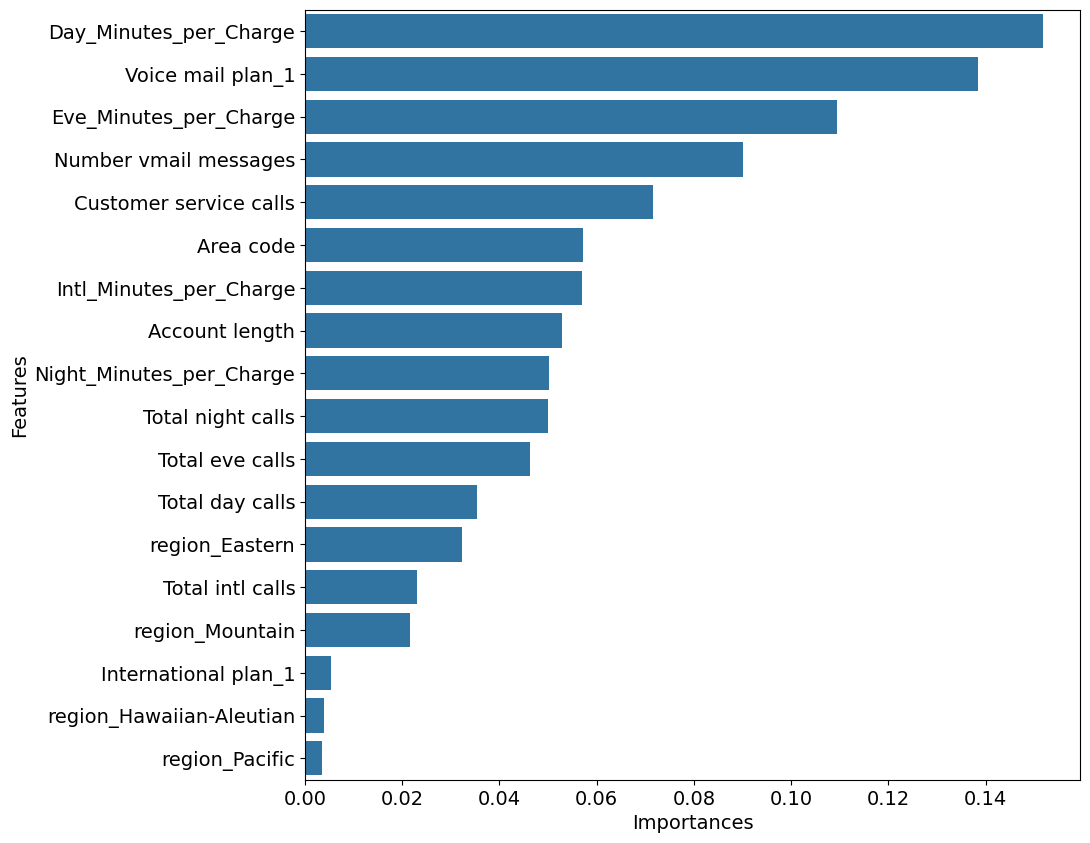

In [82]:
# Visualize the feature importances
plt.figure(figsize = (10, 10))
rfimpdf = pd.DataFrame(data = {'Features': X_train.columns, 'Importances': rfimp})
rfimpdf = rfimpdf.sort_values(by = 'Importances', ascending = False)
sns.barplot(data = rfimpdf, x = 'Importances', y = 'Features', orient = 'h');

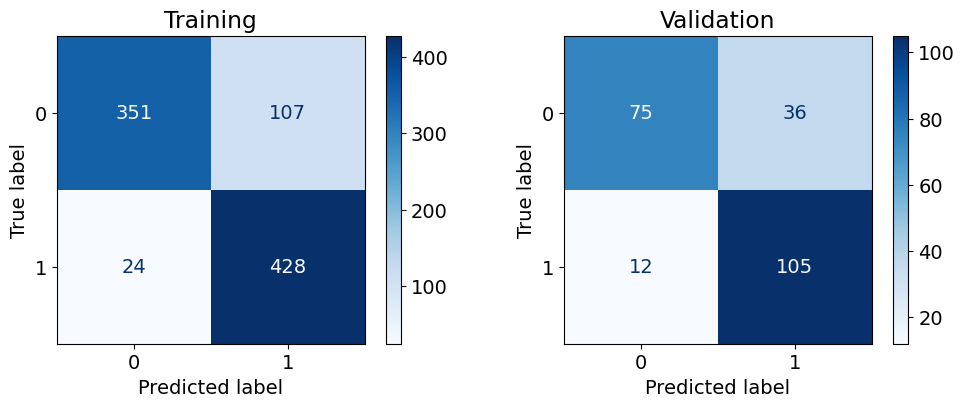

In [83]:
# Display the confusion matrices for the model on the training and validation data
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(rf_base, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(rf_base, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

The training and validation sets are not balanced in the confusion matrix, meaning that this could lead to underestimation or overestimation of some certain classes.

In [84]:
# Compute the accuracy scores on the training and validation data
# Obtain predictions
y_pred_train = rf_base.predict(X_train)
y_pred_val = rf_base.predict(X_val)

# Compute accuracy scores
train_acc = accuracy_score(y_train, y_pred_train)
val_acc = accuracy_score(y_val, y_pred_val)

print('Accuracy on the training data = {}'.format(train_acc))
print('Accuracy on the validation data = {}'.format(val_acc))

Accuracy on the training data = 0.856043956043956
Accuracy on the validation data = 0.7894736842105263


In [85]:
# Compute the ROC AUC scores for the training and the validation data
# Obtain predicted probabilities for class '1'
train_probabilities = rf_base.predict_proba(X_train)[:,1]
val_probabilities = rf_base.predict_proba(X_val)[:,1]

# Compute ROC AUC scores
train_auc = roc_auc_score(y_train, train_probabilities)
val_auc = roc_auc_score(y_val, val_probabilities)

print('ROC AUC score for the training data = {}'.format(train_auc))
print('ROC AUC score for the validation data = {}'.format(val_auc))

ROC AUC score for the training data = 0.9665388182555937
ROC AUC score for the validation data = 0.8962808962808964


In [86]:
rf_base.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'ccp_alpha': [0.0, 0.001, 0.1, 0.01],
    'criterion': ['gini','entropy'],
    'max_depth': [5,7,9],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,4,6],
    'n_estimators': [200],
    'random_state': [123],
}


# Create the Random Forest classifier
rf = RandomForestClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)

# Extract results from grid search
results = grid_search.cv_results_

# Convert results to a DataFrame
performance_df = pd.DataFrame(results)

# Set index to 'param_n_estimators'
performance_df.set_index('param_n_estimators', inplace=True)

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 123}
Best ROC AUC Score: 0.9424424399723014


In [91]:
best_estimator

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=123)

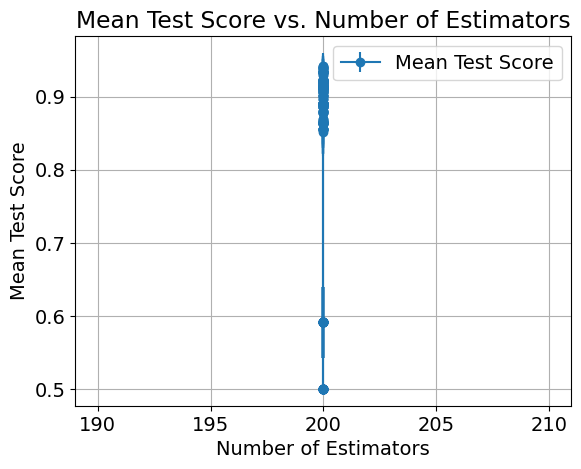

In [92]:
# Extract relevant parameters and scores from results
n_estimators = performance_df.index
mean_test_score = performance_df['mean_test_score']
std_test_score = performance_df['std_test_score']

# Plot mean test score with error bars
plt.errorbar(n_estimators, mean_test_score, yerr=std_test_score, fmt='o-', label='Mean Test Score')
plt.title('Mean Test Score vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
rf_2 = RandomForestClassifier(n_estimators = 200, max_depth = 9, class_weight = 'balanced', random_state= 123)

# Fit the model to the training data
rf_2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=200,
                       random_state=123)

In [94]:
# Obtain feature importances from the model
rf2imp = rf_2.feature_importances_
rf2imp

array([0.07912814, 0.04745087, 0.05850092, 0.05832449, 0.06816136,
       0.06189023, 0.04069   , 0.05639229, 0.00647339, 0.08436904,
       0.02250207, 0.0032877 , 0.02376772, 0.00610393, 0.13630119,
       0.10970521, 0.06344898, 0.07350246])

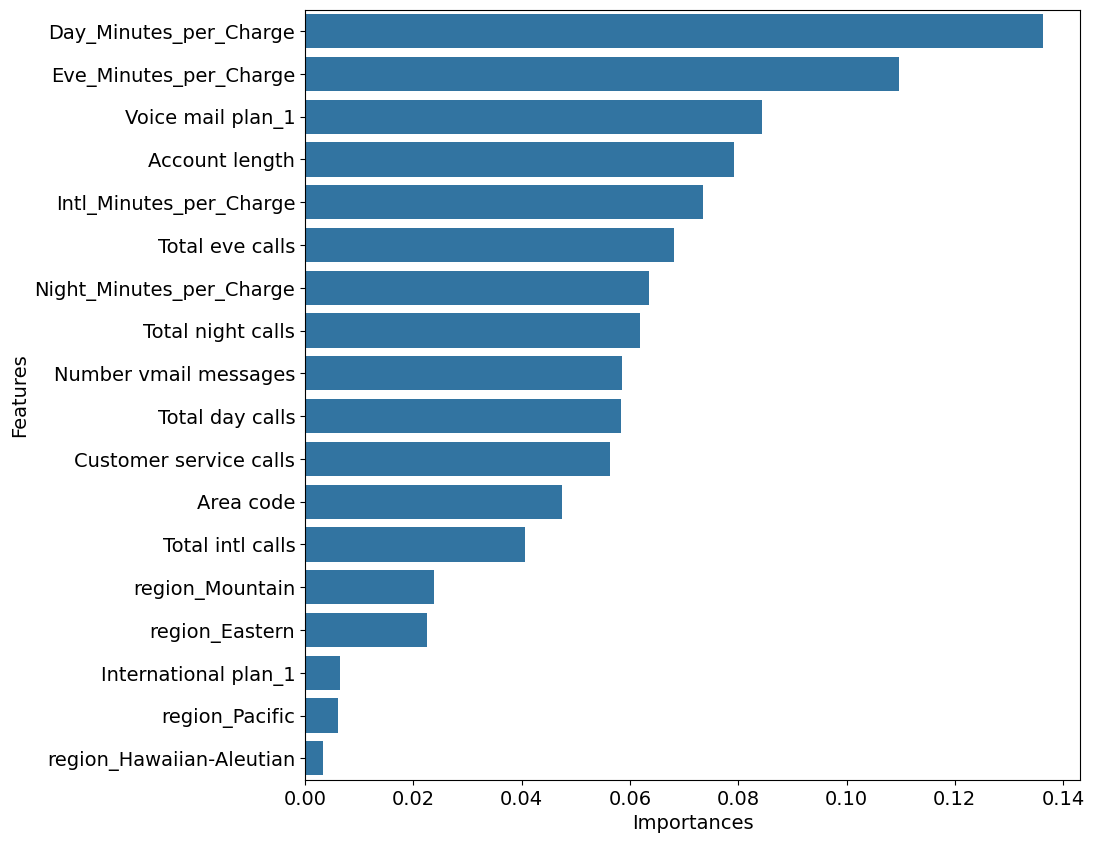

In [95]:
# Visualize the feature importances
plt.figure(figsize = (10, 10))
rf2impdf = pd.DataFrame(data = {'Features': X_train.columns, 'Importances': rf2imp})
rf2impdf = rf2impdf.sort_values(by = 'Importances', ascending = False)
sns.barplot(data = rf2impdf, x = 'Importances', y = 'Features', orient = 'h');

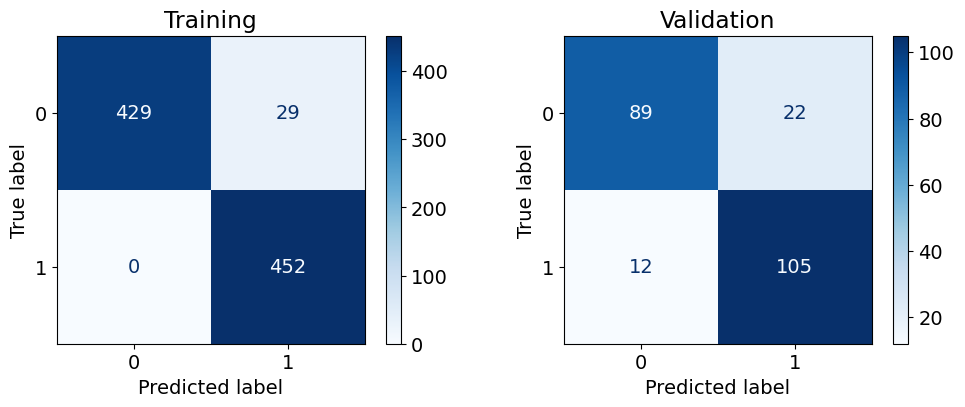

In [96]:
# Display the confusion matrices for the model on the training and validation data
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(rf_2, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(rf_2, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

In [97]:
# Compute the accuracy scores on the training and validation data
# Obtain predictions
y_pred_train = rf_2.predict(X_train)
y_pred_val = rf_2.predict(X_val)

# Compute accuracy scores
train_acc2 = accuracy_score(y_train, y_pred_train)
val_acc2 = accuracy_score(y_val, y_pred_val)

print('Accuracy on the training data = {}'.format(train_acc2))
print('Accuracy on the validation data = {}'.format(val_acc2))

Accuracy on the training data = 0.9681318681318681
Accuracy on the validation data = 0.8508771929824561


In [100]:
# Assuming you already have a trained decision tree model named 'dt_model'
# Make predictions on the test data
y_pred = rf_2.predict(X_val)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Extract TP, FP, TN, FN from confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Compute Specificity and Sensitivity
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

print("Specificity (True Negative Rate):", specificity)
print("Sensitivity (True Positive Rate or Recall):", sensitivity)

Specificity (True Negative Rate): 0.8018018018018018
Sensitivity (True Positive Rate or Recall): 0.8974358974358975


With a specificity of approximately 0.802, it means that around 80.2% of customers who are not churning are correctly identified as such. This indicates a moderately high accuracy in classifying customers who are not likely to churn. While it's not as high as in some cases, it still suggests that the model is fairly effective in distinguishing non-churning customers.

With a sensitivity of about 0.897, it indicates that roughly 89.7% of customers who are actually churning are correctly identified by the model. This suggests that the model performs well in capturing customers who are likely to churn. It accurately detects the majority of churning customers, indicating a good ability to recognize those who need intervention.

In [120]:
from sklearn.metrics import precision_score

precision = precision_score(y_val, y_pred)

print("Precision:", precision)

Precision: 0.8267716535433071


A precision score of approximately 0.827 suggests that around 82.7% of the positive predictions made by the Random Forest model are accurate, indicating a high level of reliability in identifying customers at risk of churning.

In [101]:
# Compute the ROC AUC scores for the training and the validation data
# Obtain predicted probabilities for class '1'
train_probabilities = rf_2.predict_proba(X_train)[:,1]
val_probabilities = rf_2.predict_proba(X_val)[:,1]

# Compute ROC AUC scores
train_auc2 = roc_auc_score(y_train, train_probabilities)
val_auc2 = roc_auc_score(y_val, val_probabilities)

print('ROC AUC score for the second training data = {}'.format(train_auc2))
print('ROC AUC score for the second validation data = {}'.format(val_auc2))

# Compute the ROC AUC scores for the training and the validation data
# Obtain predicted probabilities for class '1'
train_probabilities = rf_base.predict_proba(X_train)[:,1]
val_probabilities = rf_base.predict_proba(X_val)[:,1]

# Compute ROC AUC scores
train_auc = roc_auc_score(y_train, train_probabilities)
val_auc = roc_auc_score(y_val, val_probabilities)

print('ROC AUC score for the first training data = {}'.format(train_auc))
print('ROC AUC score for the first validation data = {}'.format(val_auc))

ROC AUC score for the second training data = 0.9997101673300614
ROC AUC score for the second validation data = 0.9423269423269424
ROC AUC score for the first training data = 0.9665388182555937
ROC AUC score for the first validation data = 0.8962808962808964


The second random forest did better with the training and testing set.

In [119]:
# Get feature importances
feature_importances = rf_2.feature_importances_

# Pair feature names with their importances
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort feature importances in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted features and their importances
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

Day_Minutes_per_Charge: 0.1363011897002303
Eve_Minutes_per_Charge: 0.10970520599882642
Voice mail plan_1: 0.08436904229058559
Account length: 0.07912814337690305
Intl_Minutes_per_Charge: 0.07350245759588056
Total eve calls: 0.06816135720985489
Night_Minutes_per_Charge: 0.06344898150122529
Total night calls: 0.06189022804464784
Number vmail messages: 0.05850092032980106
Total day calls: 0.058324488764795276
Customer service calls: 0.05639228937911035
Area code: 0.047450873452394
Total intl calls: 0.04069000258594171
region_Mountain: 0.0237677219764171
region_Eastern: 0.02250207084751501
International plan_1: 0.006473392677908025
region_Pacific: 0.006103933072467513
region_Hawaiian-Aleutian: 0.0032877011954960487


## Ensemble Methods

In [102]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [103]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the entire dataset
X_smote, y_smote = smote.fit_resample(X, y)

y_smote.value_counts()

Churn
0    569
1    569
Name: count, dtype: int64

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size= 0.2, random_state=123)

In [105]:
from sklearn.ensemble import BaggingClassifier

# Create a base decision tree classifier
base_model = DecisionTreeClassifier()

# Create a bagging classifier with 10 base estimators
bagging_model = BaggingClassifier(base_model, n_estimators=10)

# Train the bagging model on the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = bagging_model.predict(X_test)

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate predictions
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       111
           1       0.84      0.87      0.85       117

    accuracy                           0.85       228
   macro avg       0.85      0.85      0.85       228
weighted avg       0.85      0.85      0.85       228

[[ 91  20]
 [ 15 102]]


In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate predictions
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.15350877192982457
Mean Absolute Error: 0.15350877192982457
R-squared: 0.3855393855393856


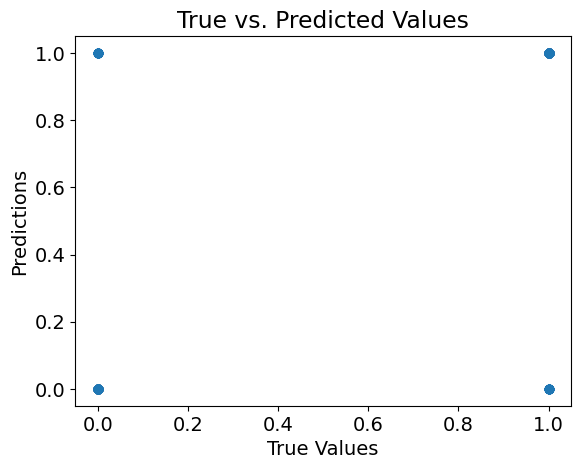

In [108]:
# Visualize predicted vs. true values (for regression tasks)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs. Predicted Values")
plt.show()


In [109]:
bagging_model.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [112]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their search space
param_grid = {
    'n_estimators': [10, 50, 100],
    'estimator__ccp_alpha': [0.0],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__min_samples_leaf': [1,10],
    'estimator__min_samples_split': [2,15],
    'estimator': [DecisionTreeClassifier()],
    'max_features': [1, 2, 5],
    'max_samples': [1,2,5],
    'n_estimators': [10,100]
}

# Initialize the base model (e.g., BaggingClassifier)
base_model = BaggingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_smote, y_smote)


# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_


# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)

# Extract results from grid search
results = grid_search.cv_results_

# Convert results to a DataFrame
performance_df = pd.DataFrame(results)

# Set index to 'param_n_estimators'
performance_df.set_index('param_n_estimators', inplace=True)


Best Parameters: {'estimator': DecisionTreeClassifier(criterion='entropy'), 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'entropy', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'max_features': 2, 'max_samples': 5, 'n_estimators': 100}
Best ROC AUC Score: 0.5870314552902078


In [113]:
best_estimator

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_features=2, max_samples=5, n_estimators=100)

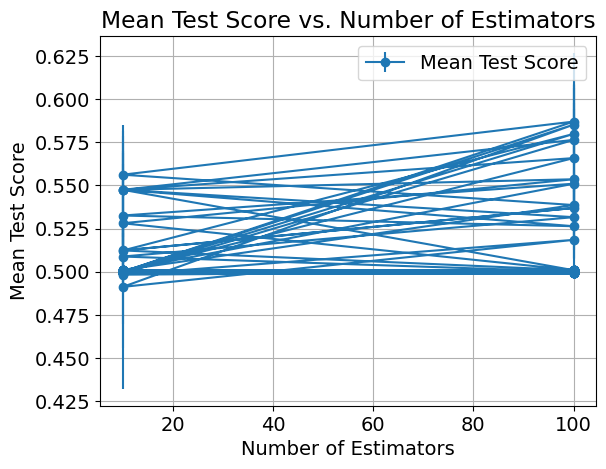

In [114]:
# Extract relevant parameters and scores from results
n_estimators = performance_df.index
mean_test_score = performance_df['mean_test_score']
std_test_score = performance_df['std_test_score']

# Plot mean test score with error bars
plt.errorbar(n_estimators, mean_test_score, yerr=std_test_score, fmt='o-', label='Mean Test Score')
plt.title('Mean Test Score vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
# Create a base decision tree classifier
base_model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2)

# Create a bagging classifier with 10 base estimators
bagging_2 = BaggingClassifier(base_model, n_estimators=100, max_samples=5, max_features=2)

# Train the bagging model on the training data
bagging_2.fit(X_train, y_train)

# Make predictions on the test data
predictions = bagging_2.predict(X_test)

In [118]:
# Make predictions on the test data
predictions = bagging_2.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Extract TN, FP, FN, TP from confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Compute Specificity and Sensitivity
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

print("Specificity (True Negative Rate):", specificity)
print("Sensitivity (True Positive Rate or Recall):", sensitivity)

Specificity (True Negative Rate): 0.7117117117117117
Sensitivity (True Positive Rate or Recall): 0.5042735042735043


With a specificity of approximately 0.712, it means that around 71.2% of non-churning customers are correctly identified as such. This suggests that the model is somewhat effective in classifying customers who are not likely to churn. However, there's room for improvement as there are still a significant portion of non-churning customers misclassified as churning.

With a sensitivity of about 0.504, it indicates that roughly 50.4% of churning customers are correctly identified by the model. This suggests that the model is moderately effective in capturing customers who are likely to churn. However, the sensitivity score is relatively low, indicating that there is a substantial portion of churning customers that the model fails to identify.

# **Executive Summary**

**Problem Statement** To save $3500 on advertisement per customer churn, a major cell phone company must find the features that influence customer churn.

**Modeling Approach**

- Logistic Regression
- Decision Tree
- Random Forest
- Ensemble Method (Bagging)


**Model Evaluation**

- Best model overall: Random Forest with a specificity of 80.2% and sensitivity of 89.7%.

- Strengths/Limitations: There is room for improvement on the sensitivity, but generally pretty good at predicting customer churn when they are going to churn.

**Key Findings**

- Important features/predictors:
1. Day_Minutes_per_Charge: This feature has the highest importance, suggesting that the average number of minutes per charge during the daytime is the most influential feature in predicting the target variable. Customers who use more minutes per charge during the daytime are more likely to exhibit certain behaviors or characteristics related to the customer churn.

2. Eve_Minutes_per_Charge: This feature has the second-highest importance. It indicates that the average number of minutes per charge during the evening is also a significant predictor. Customers who use more minutes per charge during the evening might have distinct patterns or behaviors that impact churn.

3. Voice mail plan_1: The presence or absence of a voice mail plan is the third most important feature. This suggests that whether a customer has a voice mail plan or not significantly influences the prediction.

4. Account length: This feature ranks fourth in importance. It implies that the duration of the customer's account might have a meaningful impact on predicting customer churn.

5. Intl_Minutes_per_Charge: The average number of international minutes per charge ranks fifth in importance. It suggests that international calling behavior could be indicative of certain customer characteristics related to churn.

6. Total eve calls, Night_Minutes_per_Charge, Total night calls, Number vmail messages, Total day calls, Customer service calls, Area code, Total intl calls: These features follow, each contributing to the model's predictive power to varying degrees.

7. region_Mountain, region_Eastern, International plan_1, region_Pacific, region_Hawaiian-Aleutian: These features have relatively lower importances compared to the others, suggesting they have less impact on predicting customer churn.


**Recommendations**

Potential strategies:

1. Focus on reducing churn among customers with high daytime usage: Given that "Day_Minutes_per_Charge" is identified as the most influential feature, targeted efforts can be made to retain customers who heavily utilize their phones during the daytime. This could involve tailored marketing campaigns or incentives to encourage loyalty among these high-usage customers.

2. Enhance voice mail plan offerings: Since the presence or absence of a voice mail plan is a significant predictor of churn, improving or expanding voice mail plan options could help in customer retention efforts. This might include offering enhanced features or personalized plans to cater to varying customer needs.

3. Address international calling behavior: The importance of "Intl_Minutes_per_Charge" suggests that international calling patterns are indicative of churn risk. Implementing strategies to address the needs or concerns of customers with high international usage could help mitigate churn in this segment.

4. Improve customer service experiences: The "Customer service calls" feature contributes to the model's predictive power, indicating that customer interactions with service representatives impact churn likelihood. Enhancing the quality of customer service interactions and providing prompt resolutions to issues could lead to improved customer satisfaction and loyalty.

**Conclusion**

In conclusion, the analysis has identified several key features that significantly influence customer churn within the cell phone company's customer base. By understanding these predictors, the company can develop targeted strategies to reduce churn and enhance customer retention efforts. Leveraging insights from the best-performing model, Random Forest, along with the identified important features, the company can prioritize initiatives aimed at addressing the underlying factors driving churn. By implementing targeted strategies and continuously monitoring and refining approaches, the company can work towards achieving its goal of reducing advertisement costs associated with customer churn while fostering long-term customer loyalty and profitability.

Main Takeaways:

* Daytime phone usage, evening usage, and the presence of a voice mail plan are among the most influential factors affecting customer churn.

* Strategies to retain high-usage customers during peak hours, enhance voice mail plan offerings, address international calling needs, and improve customer service experiences are recommended.

* The Random Forest model emerges as the best-performing model for predicting customer churn, providing valuable insights for targeted retention efforts.